# Métodos de Ordenamiento

## Algoritmo de Ordenamiento Selección (Selection sort)
La idea de este algoritmo es que en cada iteración $i$, buscamos y posicionamos el $i-esimo$ elemento mas pequeño y lo intercambiamos con el que esta en la posición $i$ actualmente.

In [4]:
def swap(A,x,y):
    print("Posición "+str(x)+" por posición "+str(y))
    print(A)
    aux=A[x]
    A[x]=A[y]
    A[y]=aux
    
def selection(arr):
    n=len(arr)
    for i in range(0,n):
        minimum=i
        for j in range(i+1,n):
            if arr[j]<arr[minimum]:
                minimum=j
        swap(arr,i,minimum)                

El algoritmo de selección, como podemos ver, consta de dos iteraciones, la primera establece el mínimo en la posición actual $i$, el segundo busca si en el resto de la lista $[i...n]$ existe algún elemento menor para posicionar en $i$. Las comparaciones se realizan todas, sin importar los datos de entrada ya que este algoritmo es insensitivo al orden. Sin embargo, su ventaja respecto a burbuja es que solo realiza un intercambio por iteración de $i$.

Para observar como funciona este algoritmo paso a paso, crearemos un arreglo desordenado. Cada linea contendrá, que es lo que hay que cambiar y el estado actual del arreglo. Para este caso solo hemos considerado mostrar cuando se realiza un intercambio para evitar una traza demasiado extensa.

In [5]:
arreglo=[15,5,8,9,3,2,7,18,12]
selection(arreglo)
print ("Resultado final")
print (arreglo)

Posición 0 por posición 5
[15, 5, 8, 9, 3, 2, 7, 18, 12]
Posición 1 por posición 4
[2, 5, 8, 9, 3, 15, 7, 18, 12]
Posición 2 por posición 4
[2, 3, 8, 9, 5, 15, 7, 18, 12]
Posición 3 por posición 6
[2, 3, 5, 9, 8, 15, 7, 18, 12]
Posición 4 por posición 4
[2, 3, 5, 7, 8, 15, 9, 18, 12]
Posición 5 por posición 6
[2, 3, 5, 7, 8, 15, 9, 18, 12]
Posición 6 por posición 8
[2, 3, 5, 7, 8, 9, 15, 18, 12]
Posición 7 por posición 8
[2, 3, 5, 7, 8, 9, 12, 18, 15]
Posición 8 por posición 8
[2, 3, 5, 7, 8, 9, 12, 15, 18]
Resultado final
[2, 3, 5, 7, 8, 9, 12, 15, 18]


### Mejor Caso, Peor Caso y Caso Promedio
Como ya se ha mencionado, al ser este un algoritmo insensitivo a los datos de entrada, siempre realiza todas las comparaciones, por ende no importa como, siempre estaremos en el mismo caso.

Para comenzar el cálculo de complejidad, debemos establecer primero el número de comparaciones que realiza cada iteración. En la primera iteración se comparan todos contra el primer elemento, es decir, $n-1$ comparaciones. En la segunda iteración, el segundo elemento queda fijo y se compara contra todos, salvo el primero que ya esta ordenado, es decir, $n-2$ comparaciones. En general, podemos decir que para cada iteración $i$, el número de comparaciones será $n-i$, hasta la penúltima iteración que realizará $n-(n-1) = 1$ comparación.

De este modo, la ecuación $T(n)$, que representa al trabajo acumulado de este algoritmo es:
$$T(n)=\sum_{i=n-1}^{1}i$$
Por conmutatividad:
$$T(n)=\sum_{i=n-1}^{1}i$$
$$T(n)=\frac{(n-1)n}{2}$$
$$T(n)=\frac{n^2}{2}-\frac{n}{2}$$
$$T(n)\sim\frac{n^2}{2}=O(n^2)$$

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
import time as tm
import scipy as sp

def swap(A,x,y):
    aux=A[x]
    A[x]=A[y]
    A[y]=aux

def selection(arr):
    n=len(arr)
    for i in range(0,n):
        minimum=i
        for j in range(i+1,n):
            if arr[j]<arr[minimum]:
                minimum=j
        swap(arr,i,minimum) 
                

Definimos el arreglo donde se guardarán los números a ordenar, un arreglo con los tamaños de los arreglos a ordenar y un arreglo para guardar los tiempos de ejecución.


In [7]:
arreglo=[]
sizes=[64,128,256,512,1024,2048,4096,8192]
tiempos=[]

En el siguiente ciclo se generarán los arreglos con números aleatorios (lineas 2 y 3), se ordenarán con selección tomando sus tiempos (lineas 5 al 8) y luego se descartarán para pasar al siguiente tamaño en el arreglo sizes (lineas 10 y 11). <font color="red">OJO: dependiendo del tamaños de los arreglos el siguiente bloque podría tomar un tiempo considerable en terminar. Como referencia, con burbuja un arreglo de 65536 elementos demora aproximadamente 10 minutos en un pc de escritorio.</font>

In [9]:
for curr_size in sizes:
    for i in range(0,curr_size):
        arreglo.append(rnd.randint(1,200000))
    
    tiempo_inicial=tm.time()
    selection(arreglo)
    tiempo_final=tm.time()
    tiempos.append(tiempo_final-tiempo_inicial)
    
    del arreglo
    arreglo=[]
    
print (sizes)
print (tiempos)

[64, 128, 256, 512, 1024, 2048, 4096, 8192]
[0.0008561611175537109, 0.0008268356323242188, 0.0039899349212646484, 0.01869988441467285, 0.05525016784667969, 0.20858311653137207, 0.8332440853118896, 3.296926975250244]


Finalmente gráficamos los tiempos a través de la librería matplotlib. Los puntos corresponden a las coordenadas sizes x tiempos y la linea es la aproximación a través de una función cuadrática. Podemos ver que obtenemos el comportamiento esperado para el ordenamiento tipo selección.


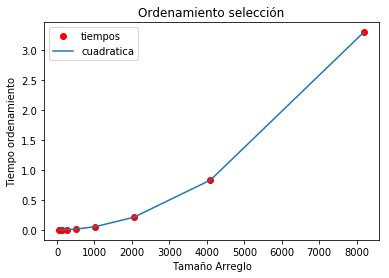

In [11]:
aproximacion=sp.polyfit(sizes,tiempos,2)

plt.plot(sizes, tiempos, "or", label='tiempos')
plt.plot(sizes, sp.polyval(aproximacion,sizes), label='cuadratica')
plt.xlabel('Tamaño Arreglo')
plt.ylabel('Tiempo ordenamiento')

plt.title('Ordenamiento selección')

plt.legend(loc='best')

plt.show()